<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/HW_2_2_2_Logistic_regression_with_scikit_learn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Запит до Gemini 1

Потрібно визначити цільову змінну Exited за допомогою логістичної регресії

Пропусків в даних немає

На що потрібно звернути увагу при препроцесингу даних?

які параметри доцільно використати при кодуванні і масштабуванні ознак?

Як оптимально налаштувати модель логістичної регресії для цієї задачі?

Привіт! Чудова задача для логістичної регресії. Вона ідеально підходить для прогнозування бінарної цільової змінної, такої як `Exited` (відтік клієнтів).

Ось на що варто звернути увагу при препроцесингу даних, які параметри використати для кодування та масштабування, а також як оптимально налаштувати модель логістичної регресії.

---

## Препроцесинг даних: На що звернути увагу

Перед тим як подавати дані моделі логістичної регресії, важливо правильно їх підготувати.

1.  **Видалення непотрібних стовпців:**
    * **ID:** Цей стовпець є просто унікальним ідентифікатором рядка і не несе жодної інформації для моделі, тому його слід видалити.
    * **Customer ID:** Ви вже зазначили, що його потрібно видалити через дублікати та відсутність прогностичної цінності. Абсолютно вірно.
    * **Surname:** Прізвище клієнта зазвичай не є прогностичною ознакою для відтоку і може створювати зайвий шум або навіть призвести до витоку даних, якщо там є якась прихована інформація. Краще його видалити.

2.  **Обробка категоріальних ознак:**
    * Логістична регресія працює з числовими даними. Категоріальні ознаки, такі як `Geography` (Країна) та `Gender` (Стать), потрібно перетворити на числові.

3.  **Масштабування числових ознак:**
    * Логістична регресія, як і багато інших алгоритмів, чутлива до масштабу числових ознак. Ознаки з більшими значеннями можуть домінувати над ознаками з меншими значеннями, що може призвести до менш ефективного навчання моделі. Масштабування вирівнює діапазони значень ознак.

4.  **Визначення цільової змінної:**
    * `Exited` (`1` = залишив банк, `0` = не залишив) - це ваша цільова змінна, яку модель буде намагатися передбачити. Вона вже має бінарний формат, що ідеально підходить для логістичної регресії.

5.  **Розбиття даних:**
    * Завжди розбивайте дані на навчальний (training) та тестовий (testing) набори. Це дозволяє оцінити, наскільки добре ваша модель узагальнює дані, які вона "ніколи не бачила". Стандартне співвідношення 70/30 або 80/20.

---

## Параметри для кодування та масштабування ознак

### 1. Кодування категоріальних ознак

* **`Geography` (Франція, Іспанія, Німеччина):**
    * **Метод:** **One-Hot Encoding** (Даммі-змінні). Оскільки між країнами немає природного порядку (Франція не "більша" за Іспанію), One-Hot Encoding є найкращим вибором. Він створить нові бінарні стовпці (наприклад, `Geography_France`, `Geography_Spain`, `Geography_Germany`), де 1 означає належність до цієї країни, а 0 - ні.
    * **Важливий аспект:** Уникайте "даммі-пастки" (dummy variable trap). При One-Hot Encoding з `N` категорій зазвичай створюють `N-1` нових стовпців. Наприклад, якщо у вас є `Geography_France`, `Geography_Spain`, то `Geography_Germany` буде зрозуміло, коли обидва перші стовпці дорівнюють 0. Це запобігає мультиколінеарності.

* **`Gender` (Чоловік, Жінка):**
    * **Метод:** Також **One-Hot Encoding**, або простий **бінарний кодер** (наприклад, `Male` = 1, `Female` = 0). Оскільки тут лише дві категорії, ці методи по суті однакові. Можна перетворити "Чоловік" на 1, "Жінка" на 0.

### 2. Масштабування числових ознак

Для логістичної регресії рекомендується використовувати **стандартизацію**.

* **Метод:** **StandardScaler**. Цей метод масштабує ознаки так, щоб вони мали нульове середнє (`mean=0`) та одиничне стандартне відхилення (`std=1`).
* **Ознаки для масштабування:**
    * `Credit Score`
    * `Age`
    * `Tenure`
    * `Balance`
    * `NumOfProducts`
    * `EstimatedSalary`
* **Ознаки, які НЕ потребують масштабування:**
    * `HasCrCard` (вже бінарна, 0 або 1)
    * `IsActiveMember` (вже бінарна, 0 або 1)
    * Новостворені даммі-змінні з `Geography` та `Gender`.

**Важливо:** Завжди застосовуйте `StandardScaler.fit()` лише до навчальних даних, а потім використовуйте `StandardScaler.transform()` для обох - навчальних та тестових даних. Це запобігає витоку інформації з тестового набору в навчальний процес.

---

## Оптимальне налаштування моделі логістичної регресії

Логістична регресія є досить простою, але ефективною моделлю. Її "оптимальне" налаштування часто включає кілька кроків.

1.  **Вибір класу моделі:**
    * Використовуйте `LogisticRegression` з бібліотеки `scikit-learn`.

2.  **Регуляризація:**
    * Логістична регресія в `scikit-learn` за замовчуванням застосовує **L2-регуляризацію** (`penalty='l2'`). Це допомагає запобігти перенавчанню моделі, зменшуючи величину коефіцієнтів.
    * **Параметр `C`**: Це обернена сила регуляризації. Менші значення `C` означають сильнішу регуляризацію (більше "штрафу" за великі коефіцієнти), а більші значення `C` - слабшу. За замовчуванням `C=1.0`.
    * **Налаштування `C`**: Ви можете спробувати різні значення `C` (наприклад, 0.01, 0.1, 1, 10, 100) за допомогою методів крос-валідації.

3.  **Оптимізатор:**
    * Параметр `solver` визначає алгоритм, який використовується для оптимізації моделі (знаходження оптимальних коефіцієнтів). Для більшості випадків, особливо для невеликих та середніх датасетів, добре підходять:
        * `'liblinear'` (добре для невеликих наборів даних, підтримує L1/L2 регуляризацію)
        * `'lbfgs'` (хороший вибір за замовчуванням для багатьох задач, підтримує лише L2)
        * `'saga'` (підходить для великих наборів даних та L1/L2/Elastic-Net регуляризації)
    * Почніть з `'lbfgs'` або `'liblinear'`.

4.  **Обробка незбалансованих класів (Class Imbalance):**
    * **Увага!** Відтік клієнтів (коли `Exited=1`) часто є меншістю в наборі даних. Якщо відтоку набагато менше, ніж тих, хто залишився (наприклад, 10% проти 90%), модель може навчитися просто передбачати "0" для всіх, досягаючи високої точності, але будучи марною.
    * **Рішення:**
        * **`class_weight='balanced'`**: Це найпростіший і часто дуже ефективний спосіб. Він автоматично коригує ваги класів у функції втрат пропорційно частоті їх появи у навчальних даних. Це дає більший "штраф" за неправильну класифікацію міноритарного класу.
        * **Передискретизація (Resampling):** Методи, такі як Oversampling міноритарного класу (наприклад, SMOTE) або Undersampling мажоритарного класу. Це складніший, але потужний підхід.

5.  **Оцінка моделі:**
    * Оскільки класи можуть бути незбалансованими, **accuracy (точність)** не є найкращою метрикою.
    * Використовуйте метрики, які краще підходять для незбалансованих даних:
        * **Precision, Recall, F1-Score**: Особливо F1-Score, який є гарним балансом між Precision та Recall.
        * **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)**: Ця метрика показує, наскільки добре модель розрізняє класи, незалежно від порогу класифікації. Вищий ROC AUC (ближче до 1) означає кращу модель.
        * **Confusion Matrix**: Допомагає візуалізувати кількість правильних/неправильних класифікацій для кожного класу.

6.  **Крос-валідація (Cross-Validation):**
    * Завжди використовуйте крос-валідацію (наприклад, `KFold` або `StratifiedKFold` для незбалансованих класів) для більш надійної оцінки продуктивності моделі та для підбору гіперпараметрів (`C`, `solver`).
    * `GridSearchCV` або `RandomizedSearchCV` можуть автоматизувати цей процес.

### Приклад послідовності кроків:

```python
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np

# Припустимо, у вас є DataFrame 'df' з вашими даними

# 1. Створення фіктивних даних для прикладу (замініть на ваші реальні дані)
data = {
    'ID': range(100),
    'Customer ID': [i % 50 for i in range(100)],
    'Surname': [f'Surname_{i}' for i in range(100)],
    'Credit Score': np.random.randint(350, 850, 100),
    'Geography': np.random.choice(['France', 'Spain', 'Germany'], 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Age': np.random.randint(18, 92, 100),
    'Tenure': np.random.randint(0, 10, 100),
    'Balance': np.random.uniform(0, 250000, 100),
    'NumOfProducts': np.random.randint(1, 4, 100),
    'HasCrCard': np.random.randint(0, 2, 100),
    'IsActiveMember': np.random.randint(0, 2, 100),
    'EstimatedSalary': np.random.uniform(100, 200000, 100),
    'Exited': np.random.randint(0, 2, 100) # Цільова змінна
}
df = pd.DataFrame(data)

# Імітуємо незбалансованість: зробимо більшість Exited = 0
df['Exited'] = np.random.choice([0, 1], size=100, p=[0.85, 0.15])


# 2. Видалення непотрібних стовпців
df = df.drop(['ID', 'Customer ID', 'Surname'], axis=1)

# 3. Розбиття на ознаки (X) та цільову змінну (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# 4. Визначення категоріальних та числових ознак
categorical_features = ['Geography', 'Gender']
numerical_features = [
    'Credit Score', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'EstimatedSalary' # HasCrCard та IsActiveMember вже бінарні, не масштабуємо
]

# 5. Створення препроцесора за допомогою ColumnTransformer
# One-Hot Encoding для категоріальних
# StandardScaler для числових
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features) # drop='first' для уникнення даммі-пастки
    ],
    remainder='passthrough' # Залишити інші стовпці (HasCrCard, IsActiveMember) як є
)

# 6. Створення пайплайну: препроцесор + модель логістичної регресії
# Використовуємо class_weight='balanced' для обробки незбалансованих класів
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))
])

# 7. Розбиття даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y для збереження співвідношення класів

# 8. Налаштування гіперпараметрів за допомогою GridSearchCV (або RandomizedSearchCV)
# Визначаємо сітку параметрів для пошуку
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100], # Сила регуляризації
    'classifier__solver': ['liblinear', 'lbfgs'] # Оптимізатор
}

# Використовуємо GridSearchCV для пошуку найкращих параметрів
# scoring='roc_auc' - хороша метрика для незбалансованих класів
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nНайкращі параметри: {grid_search.best_params_}")
print(f"Найкращий ROC AUC на крос-валідації: {grid_search.best_score_:.4f}")

# 9. Оцінка моделі на тестовій вибірці
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1] # Ймовірність для класу 1

print("\nЗвіт по класифікації на тестових даних:")
print(classification_report(y_test, y_pred))

print(f"ROC AUC на тестових даних: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Виведемо Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
```

Цей код забезпечує повний цикл від препроцесингу до налаштування та оцінки моделі логістичної регресії, враховуючи ключові аспекти, які я описав. Не забудьте замінити фіктивні дані `df` на ваші реальні дані!

Успіхів з вашим проектом!

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/bank-customer-churn-prediction.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [4]:
df.iloc[:, 3:]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [5]:
# 3. Розбиття на ознаки (X) та цільову змінну (y)
X = df.iloc[:, 3:].drop('Exited', axis=1)
y = df['Exited']


In [6]:
X.shape, y.shape

((15000, 10), (15000,))

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36
1,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17
2,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87
3,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48
4,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86


In [8]:
# 4. Визначення категоріальних та числових ознак
# Ми можемо динамічно визначити ці списки, щоб уникнути помилок через опечатки або зміни в даних
all_features = X.columns.tolist() # Отримуємо всі колонки X

numerical_features = [
    col for col in all_features if X[col].dtype in ['int64', 'float64'] and col not in ['HasCrCard', 'IsActiveMember']
]
categorical_features = [
    col for col in all_features if X[col].dtype == 'object'
]
# Бінарні ознаки, які вже є числовими (0 або 1)
binary_features = ['HasCrCard', 'IsActiveMember']

# 5. Створення препроцесора за допомогою ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), categorical_features),
        ('bin', 'passthrough', binary_features) # Просто пропускаємо бінарні ознаки
    ],
    # remainder='drop' - якщо є інші колонки, які не вказані, видалити їх
    # remainder='passthrough' - залишити інші колонки без змін (не в цьому випадку, бо всі колонки вказані)
)

# 6. Створення пайплайну: препроцесор + модель логістичної регресії
# Використовуємо class_weight='balanced' для обробки незбалансованих класів
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))
])

# 7. Розбиття даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y для збереження співвідношення класів


In [9]:
# 8. Налаштування гіперпараметрів за допомогою GridSearchCV (або RandomizedSearchCV)
# Визначаємо сітку параметрів для пошуку
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100], # Сила регуляризації (обернена)
    'classifier__solver': ['liblinear', 'lbfgs'] # Оптимізатор
}

# Використовуємо GridSearchCV для пошуку найкращих параметрів
# scoring='roc_auc' - хороша метрика для незбалансованих класів
print("Запускаємо GridSearchCV для пошуку найкращих параметрів...")
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train) # Тепер цей рядок має спрацювати коректно

print(f"\nНайкращі параметри: {grid_search.best_params_}")
print(f"Найкращий ROC AUC на крос-валідації: {grid_search.best_score_:.4f}")

Запускаємо GridSearchCV для пошуку найкращих параметрів...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Найкращі параметри: {'classifier__C': 100, 'classifier__solver': 'lbfgs'}
Найкращий ROC AUC на крос-валідації: 0.8828


In [10]:
# 9. Оцінка моделі на тестовій вибірці
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1] # Ймовірність для класу 1

# Виведемо Confusion Matrix
print('Матриця на тренувальних даних')
y_pred_train = best_model.predict(X_train)
cm = confusion_matrix(y_pred_train, y_train, normalize='true').round(2)
print("\nConfusion Matrix:")
print(cm)


print("\nЗвіт по класифікації на тестових даних:")
print(classification_report(y_test, y_pred))

print(f"ROC AUC на тестових даних: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Виведемо Confusion Matrix
cm = confusion_matrix(y_pred, y_test, normalize='true').round(2)
print("\nConfusion Matrix:")
print(cm)

Матриця на тренувальних даних

Confusion Matrix:
[[0.94 0.06]
 [0.45 0.55]]

Звіт по класифікації на тестових даних:
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      2390
         1.0       0.52      0.81      0.63       610

    accuracy                           0.81      3000
   macro avg       0.73      0.81      0.75      3000
weighted avg       0.86      0.81      0.82      3000

ROC AUC на тестових даних: 0.8799

Confusion Matrix:
[[0.94 0.06]
 [0.48 0.52]]


# submission_log_reg_3   score   **0,93246**

In [11]:
import pandas as pd
import numpy as np
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, classification_report, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Area under ROC score on Training dataset: 0.832


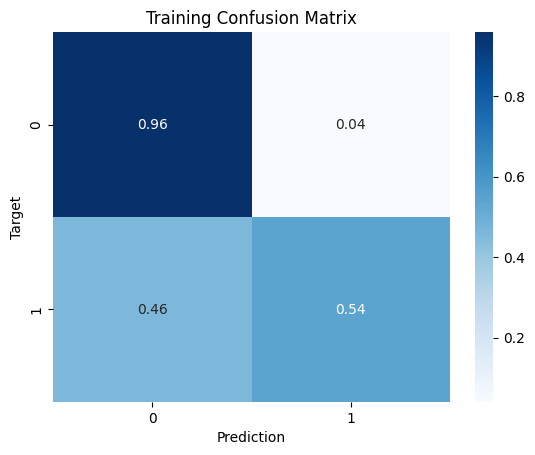

Area under ROC score on Validation dataset: 0.817


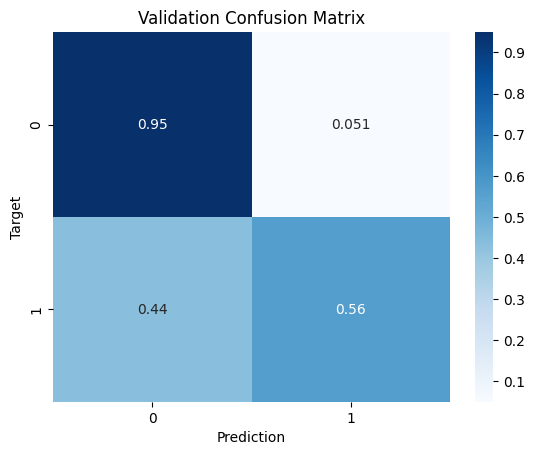

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2390
         1.0       0.74      0.56      0.64       610

    accuracy                           0.87      3000
   macro avg       0.82      0.76      0.78      3000
weighted avg       0.86      0.87      0.86      3000



['bank-customer_pipeline.joblib']

In [12]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/bank-customer-churn-prediction.csv', index_col=0)

train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Exited'])

# Створюємо трен. і вал. набори
input_cols = list(train_df.columns)[2:-1]
target_col = 'Exited'
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline.fit(train_inputs, train_targets)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(preds, targets)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.3f}")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, 'Training')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, 'Validation')

# Звіт про класифікацію
print(classification_report(val_targets, model_pipeline.predict(val_inputs)))

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'bank-customer_pipeline.joblib')

Area under ROC score on Training dataset: 0.870


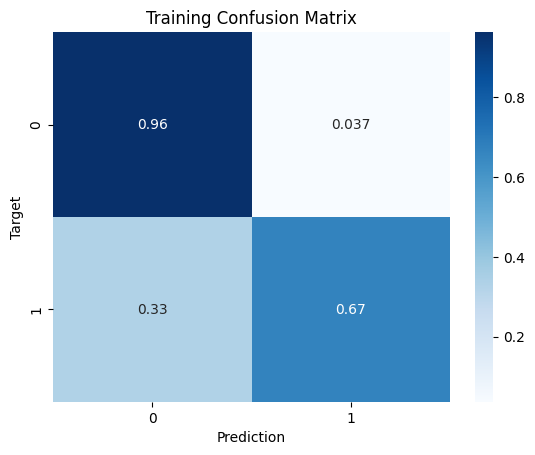

Area under ROC score on Validation dataset: 0.857


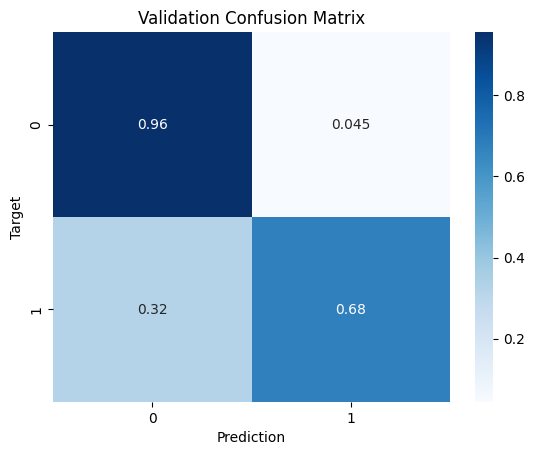

              precision  recall  f1-score   support
0.0               0.920   0.955     0.937  2390.000
1.0               0.794   0.675     0.730   610.000
accuracy          0.898   0.898     0.898     0.898
macro avg         0.857   0.815     0.834  3000.000
weighted avg      0.895   0.898     0.895  3000.000


['bank-customer_pipeline_pol5.joblib']

In [13]:
# Створюємо трансформери для числових колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('polynomial_features', PolynomialFeatures(degree=5))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline_pol5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline_pol5.fit(train_inputs, train_targets)

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline_pol5, train_inputs, train_targets, 'Training')
val_preds = predict_and_plot(model_pipeline_pol5, val_inputs, val_targets, 'Validation')

# # Звіт про класифікацію
# print(classification_report(val_targets, model_pipeline_pol5.predict(val_inputs)))

# Assuming val_targets are your true labels and model_pipeline.predict(val_inputs) are your predictions
report = classification_report(val_targets, model_pipeline_pol5.predict(val_inputs), output_dict=True)
df = pd.DataFrame(report).transpose()

# Printing with 3 decimal places
print(df.round(3))

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline_pol5, 'bank-customer_pipeline_pol5.joblib')

In [ ]:
subm_df  = pd.read_csv('/content/sample_submission.csv')

test_df = pd.read_csv('/content/test.csv')
test_pred = model_pipeline_pol5.predict_proba(test_df)[:, 1]

subm_df['Exited'] = model_pipeline_pol5.predict_proba(test_df)[:, 1]

In [ ]:
subm_df.head()

# submission_log_reg_4 score 0.93270

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Area under ROC score on Training dataset: 0.871


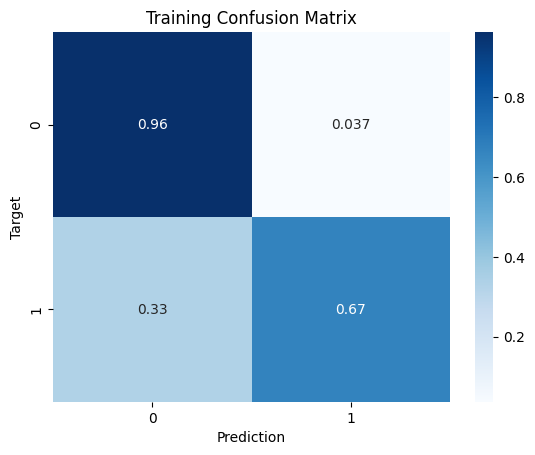

Area under ROC score on Validation dataset: 0.858


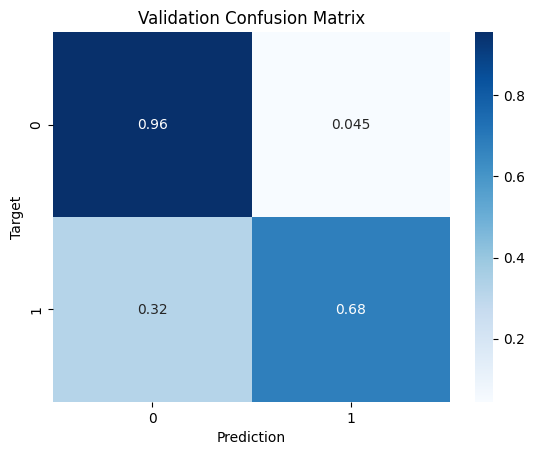

              precision  recall  f1-score   support
0.0               0.921   0.955     0.938  2390.000
1.0               0.795   0.680     0.733   610.000
accuracy          0.899   0.899     0.899     0.899
macro avg         0.858   0.818     0.836  3000.000
weighted avg      0.896   0.899     0.896  3000.000


['bank-customer_pipeline_pol5.joblib']

In [14]:
# Створюємо трансформери для числових колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('polynomial_features', PolynomialFeatures(degree=5))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline_pol5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='lbfgs', penalty = 'l2'))

])

# Тренуємо пайплайн
model_pipeline_pol5.fit(train_inputs, train_targets)

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline_pol5, train_inputs, train_targets, 'Training')
val_preds = predict_and_plot(model_pipeline_pol5, val_inputs, val_targets, 'Validation')

# # Звіт про класифікацію
# print(classification_report(val_targets, model_pipeline_pol5.predict(val_inputs)))

# Assuming val_targets are your true labels and model_pipeline.predict(val_inputs) are your predictions
report = classification_report(val_targets, model_pipeline_pol5.predict(val_inputs), output_dict=True)
df = pd.DataFrame(report).transpose()

# Printing with 3 decimal places
print(df.round(3))

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline_pol5, 'bank-customer_pipeline_pol5.joblib')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

subm_df  = pd.read_csv('/content/sample_submission.csv')

test_df = pd.read_csv('/content/test.csv')
test_pred = model_pipeline_pol5.predict_proba(test_df)[:, 1]

subm_df['Exited'] = model_pipeline_pol5.predict_proba(test_df)[:, 1]

subm_df.to_csv('submission_log_reg_4.csv', index=False)

In [ ]:
subm_df.head()

In [ ]:
# Припустимо твій пайплайн називається model_pipeline_pol4
preprocessor = model_pipeline_pol5.named_steps['preprocessor']

# Після фіта протренованого пайплайну
feature_names = preprocessor.get_feature_names_out()
print(len(feature_names))

In [ ]:
# #coefs_df = pd.DataFrame(poly_features.get_feature_names_out(X_train.columns), columns=['feature_name'])
# coefs_df['value'] = model_pipeline_pol5.coef_.round(5).flatten()
# coefs_df.set_index('feature_name').sort_values(by='value', ascending=False).style.background_gradient()

# Отримання трансформованих назв ознак
transformed_feature_names = model_pipeline_pol5.named_steps['preprocessor'].get_feature_names_out()

# Отримання коефіцієнтів з класифікатора
coefficients = model_pipeline_pol5.named_steps['classifier'].coef_[0]
intercept = model_pipeline_pol5.named_steps['classifier'].intercept_[0]

# Створення DataFrame для зручного перегляду
feature_importance_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Coefficient': coefficients
})

# Сортування за абсолютною величиною коефіцієнтів
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Найзначущіші ознаки (за абсолютною величиною коефіцієнта) ---")
print(feature_importance_df.head(20)) # Виведемо топ-20 найзначущіших

print(f"\nІнтерсепт (зсув): {intercept:.4f}")

In [ ]:
display(feature_importance_df.tail(20))

In [ ]:
subm_df.to_csv('submission_log_reg_3.csv', index=False)

# Варіант з балансуванням класів

In [15]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline as SklearnPipeline # Імпортуємо sklearn Pipeline для внутрішніх трансформерів
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, classification_report, root_mean_squared_error

# Для ресемплінгу використовуємо спеціальний пайплайн від imblearn
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

raw_df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/bank-customer-churn-prediction.csv', index_col=0)


In [16]:
train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Exited'])

# Створюємо трен. і вал. набори
input_cols = list(train_df.columns)[2:-1]
target_col = 'Exited'
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# parameters
random_state = 42
solver='liblinear'
penalty = 'l2'
degree = 5

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = SklearnPipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('polynomial_features', PolynomialFeatures(degree=5, include_bias=False)) # include_bias=False для PCA
])

categorical_transformer = SklearnPipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
# Це буде перший крок у нашому ImbPipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)

# --- Інтеграція PCA ---
# Ви можете визначити кількість компонентів PCA
# Наприклад, n_components = 0.95 (зберегти 95% дисперсії) або n_components = 5 (конкретна кількість)
# Важливо: PCA застосовується *після* препроцесора
pca_transformer = PCA(n_components=0.99, random_state=42) # Або будь-яке інше значення

# --- Створення RandomOverSampler та RandomUnderSampler ---
oversampler = RandomOverSampler(random_state=random_state, sampling_strategy='auto')
undersampler = RandomUnderSampler(random_state=random_state, sampling_strategy='auto')
smote = SMOTE(random_state=random_state)
adasyn = ADASYN(random_state=random_state)
tomek = TomekLinks()
smotetomek = SMOTETomek(random_state=0)

# --- Варіант 1: Пайплайн з RandomOverSampler ---
# Використовуємо imblearn.pipeline.Pipeline
model_pipeline_with_oversampling = ImbPipeline(steps=[
    ('preprocessor', preprocessor),          # Крок 1: Препроцесинг даних
    ('pca', pca_transformer),                # Крок 2: PCA (опціонально)
    ('oversampler', oversampler),            # Крок 3: Ресемплінг (застосовується лише до X_train)
    ('classifier', LogisticRegression(solver=solver, penalty = penalty, random_state=42, #max_iter=1000
                                      )) # Крок 4: Класифікатор
])

print("Тренування пайплайну з Random Over-sampling...")
model_pipeline_with_oversampling.fit(train_inputs, train_targets)
print("Тренування завершено.")

# --- Варіант 2: Пайплайн з RandomUnderSampler ---
# Ви можете створити окремий пайплайн для кожного типу ресемплінгу
model_pipeline_with_undersampling = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_transformer),
    ('undersampler', undersampler), # Змінюємо на RandomUnderSampler
    ('classifier', LogisticRegression(solver=solver,  penalty = penalty,random_state=42, #max_iter=1000
                                      ))
])

print("\nТренування пайплайну з Random Under-sampling...")
model_pipeline_with_undersampling.fit(train_inputs, train_targets)
print("Тренування завершено.")

# --- Варіант 3: Пайплайн без ресемплінгу (для порівняння) ---
# Це звичайний sklearn.pipeline.Pipeline
model_pipeline_no_sampling = SklearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_transformer),
    ('classifier', LogisticRegression(solver=solver,  penalty = penalty,random_state=42, #max_iter=1000
                                      ))
])

print("\nТренування пайплайну без ресемплінгу...")
model_pipeline_no_sampling.fit(train_inputs, train_targets)
print("Тренування завершено.")

# --- Варіант 4: Пайплайн зі SMOTE (для порівняння) ---
# Це звичайний sklearn.pipeline.Pipeline
model_pipeline_with_SMOTE = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_transformer),
    ('smote', smote),
    ('classifier', LogisticRegression(solver=solver,  penalty = penalty,random_state=42, #max_iter=1000
                                      ))
])

print("\nТренування пайплайну зі SMOTE...")
model_pipeline_with_SMOTE.fit(train_inputs, train_targets)
print("Тренування завершено.")

# --- Варіант 5: Пайплайн з adasyn (для порівняння) ---
# Це звичайний sklearn.pipeline.Pipeline
model_pipeline_with_adasyn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_transformer),
    ('adasyn', adasyn),
    ('classifier', LogisticRegression(solver=solver,  penalty = penalty,random_state=42, #max_iter=1000
                                      ))
])

print("\nТренування пайплайну з adasyn...")
model_pipeline_with_adasyn.fit(train_inputs, train_targets)
print("Тренування завершено.")

# --- Варіант 6: Пайплайн з tomek (для порівняння) ---
# Це звичайний sklearn.pipeline.Pipeline
model_pipeline_with_tomek = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_transformer),
    ('tomek', tomek),
    ('classifier', LogisticRegression(solver=solver,  penalty = penalty,random_state=42, #max_iter=1000
                                      ))
])

print("\nТренування пайплайну з tomek...")
model_pipeline_with_tomek.fit(train_inputs, train_targets)
print("Тренування завершено.")

# --- Варіант 7: Пайплайн з SMOTETomek (для порівняння) ---
# Це звичайний sklearn.pipeline.Pipeline
model_pipeline_with_smotetomek = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_transformer),
    ('smotetomek', smotetomek),
    ('classifier', LogisticRegression(solver=solver,  penalty = penalty,random_state=42, #max_iter=1000
                                      ))
])


print("\nТренування пайплайну з smotetomek...")
model_pipeline_with_smotetomek.fit(train_inputs, train_targets)
print("Тренування завершено.")

#Тепер ви можете оцінювати ці пайплайни на тестових даних:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_df[numeric_cols + categorical_cols], raw_df['Exited'], test_size=0.2, random_state=42, stratify=raw_df['Exited'])

y_pred_oversampling = model_pipeline_with_oversampling.predict(X_test)
y_pred_proba_oversampling = model_pipeline_with_oversampling.predict_proba(X_test)[:, 1]
print(f"\nROC AUC (Oversampling): {roc_auc_score(y_test, y_pred_proba_oversampling):.4f}")
# Звіт про класифікацію
print(classification_report(y_test, model_pipeline_with_oversampling.predict(X_test)))

y_pred_undersampling = model_pipeline_with_undersampling.predict(X_test)
y_pred_proba_undersampling = model_pipeline_with_undersampling.predict_proba(X_test)[:, 1]
print(f"\nROC AUC (undersampling): {roc_auc_score(y_test, y_pred_proba_undersampling):.4f}")
# Звіт про класифікацію
print(classification_report(y_test, model_pipeline_with_undersampling.predict(X_test)))

y_pred_no_sampling = model_pipeline_no_sampling.predict(X_test)
y_pred_proba_no_sampling = model_pipeline_no_sampling.predict_proba(X_test)[:, 1]
print(f"\nROC AUC (no_sampling): {roc_auc_score(y_test, y_pred_proba_no_sampling):.4f}")
# Звіт про класифікацію
print(classification_report(y_test, model_pipeline_no_sampling.predict(X_test)))

y_pred_with_SMOTE = model_pipeline_with_SMOTE.predict(X_test)
y_pred_proba_with_SMOTE = model_pipeline_with_SMOTE.predict_proba(X_test)[:, 1]
print(f"\nROC AUC (with_SMOTE): {roc_auc_score(y_test, y_pred_proba_with_SMOTE):.4f}")
# Звіт про класифікацію
print(classification_report(y_test, model_pipeline_with_SMOTE.predict(X_test)))

y_pred_with_adasyn = model_pipeline_with_adasyn.predict(X_test)
y_pred_proba_with_adasyn = model_pipeline_with_adasyn.predict_proba(X_test)[:, 1]
print(f"\nROC AUC (with_adasyn): {roc_auc_score(y_test, y_pred_proba_with_adasyn):.4f}")
# Звіт про класифікацію
print(classification_report(y_test, model_pipeline_with_adasyn.predict(X_test)))

y_pred_with_tomek = model_pipeline_with_tomek.predict(X_test)
y_pred_proba_with_tomek = model_pipeline_with_tomek.predict_proba(X_test)[:, 1]
print(f"\nROC AUC (with_tomek): {roc_auc_score(y_test, y_pred_proba_with_tomek):.4f}")
# Звіт про класифікацію
print(classification_report(y_test, model_pipeline_with_tomek.predict(X_test)))

y_pred_with_smotetomek = model_pipeline_with_smotetomek.predict(X_test)
y_pred_proba_with_smotetomek = model_pipeline_with_smotetomek.predict_proba(X_test)[:, 1]
print(f"\nROC AUC (with_smotetomek): {roc_auc_score(y_test, y_pred_proba_with_smotetomek):.4f}")
# Звіт про класифікацію
print(classification_report(y_test, model_pipeline_with_smotetomek.predict(X_test)))

Тренування пайплайну з Random Over-sampling...
Тренування завершено.

Тренування пайплайну з Random Under-sampling...
Тренування завершено.

Тренування пайплайну без ресемплінгу...
Тренування завершено.

Тренування пайплайну зі SMOTE...
Тренування завершено.

Тренування пайплайну з adasyn...
Тренування завершено.

Тренування пайплайну з tomek...
Тренування завершено.

Тренування пайплайну з smotetomek...
Тренування завершено.

ROC AUC (Oversampling): 0.9235
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.90      2390
         1.0       0.58      0.85      0.69       610

    accuracy                           0.85      3000
   macro avg       0.77      0.85      0.79      3000
weighted avg       0.88      0.85      0.86      3000


ROC AUC (undersampling): 0.9221
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      2390
         1.0       0.57      0.86      0.69       610

    accuracy  

In [ ]:

#model_pipeline_with_oversampling.predict_proba(X_test)[:, 1]